Import the necessary packages

In [ ]:
# For data manipulation
import numpy as np  # linear algebra
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For hypothesis testing
from scipy import stats
from scipy.stats import ttest_1samp
from scipy.stats import norm

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

Load and get the head of the dataset.

In [ ]:
# Load the dataset into a DataFrame and save in a variable
df = pd.read_excel("/content/drive/MyDrive/IIP/Travel_ML.xlsx")
df.head()

,CustomerID,ProdTaken,Age,Type_Of_Contact,CityTier,DurationOfPitch,Occupat,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passpo,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


GENERAL STRUCTURE OF THE DATA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4906 entries, 0 to 4905
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4906 non-null   int64  
 1   ProdTaken                 4906 non-null   int64  
 2   Age                       4680 non-null   float64
 3   Type_Of_Contact           4881 non-null   object 
 4   CityTier                  4906 non-null   int64  
 5   DurationOfPitch           4655 non-null   float64
 6   Occupat                   4906 non-null   object 
 7   Gender                    4906 non-null   object 
 8   NumberOfPersonVisiting    4906 non-null   int64  
 9   NumberOfFollowups         4861 non-null   float64
 10  ProductPitched            4906 non-null   object 
 11  PreferredPropertyStar     4880 non-null   float64
 12  MaritalStatus             4906 non-null   object 
 13  NumberOfTrips             4766 non-null   float64
 14  Passpo  

This dataset contains information on 4,906 customers, including demographic details, interaction history, and responses to a product pitch. It has 20 columns, with a mix of numerical and categorical data.

  Demographic Information: Includes age, occupation, gender, marital status, and city tier.

  Interaction Data: Details like the type of contact, duration of the sales pitch, number of follow-ups, and satisfaction scores.

  Response Data: Indicates whether the customer accepted the product (ProdTaken).

  Other Attributes: Includes the number of trips, car ownership, number of children visiting, and monthly income.

Some columns have missing values, particularly age, pitch duration, number of follow-ups, and monthly income.

In [ ]:
df.shape

(4906, 20)

The dataset has 4906 observations and 20 attributes.

In [ ]:
# Display all column names
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'Type_Of_Contact', 'CityTier',
       'DurationOfPitch', 'Occupat', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passpo', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

This is a list of all the columns.

DESCRIPTIVE STATISTICS

In [ ]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passpo,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4906.000000,4906.000000,4680.000000,4906.000000,4655.000000,4906.000000,4861.000000,4880.000000,4766.000000,4906.000000,4906.000000,4906.000000,4838.000000,4673.000000
mean,202450.581125,0.188137,37.617949,1.655728,15.503759,2.907460,3.709936,3.581148,3.239404,0.291072,3.079698,0.620261,1.188508,23629.159854
std,1413.422756,0.390861,9.313046,0.917107,8.529326,0.725253,1.002775,0.798115,1.849185,0.454303,1.366696,0.485371,0.857669,5378.811357
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201226.250000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20353.000000
50%,202452.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22366.000000
75%,203678.750000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25607.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


   ProdTaken: Indicates product acceptance, where 18.8% of customers accepted the product. Most customers did not accept, as indicated by the 0.0 median.

   Age: The average customer age is around 37.6 years, with ages ranging from 18 to 61 years.

   CityTier: Represents the classification of cities (tiers), with most customers from Tier 1 cities (mean 1.66). The data is spread across Tiers 1, 2, and 3.

   DurationOfPitch: The average duration of the sales pitch is about 15.5 minutes, with a wide range from 5 to 127 minutes, indicating varying levels of customer engagement.

   NumberOfPersonVisiting: The average number of people visiting with the customer is around 2.91, typically between 1 to 5 people.

   NumberOfFollowups: On average, there are about 3.71 follow-ups per customer, with a range of 1 to 6 follow-ups.

   PreferredPropertyStar: Most customers prefer properties rated around 3.58 stars, with ratings ranging from 3 to 5 stars.

   NumberOfTrips: Customers have taken an average of 3.24 trips, with some taking up to 22 trips.

   Passpo: Indicates passport possession, with 29.1% of customers having a passport.

   PitchSatisfactionScore: The average satisfaction score for the sales pitch is around 3.08, on a scale of 1 to 5.

   OwnCar: 62% of customers own a car, as indicated by the mean value of 0.62.

   NumberOfChildrenVisiting: The average number of children visiting with the customer is about 1.19, with a range of 0 to 3 children.

   MonthlyIncome: The average monthly income of customers is around 23,629, with a wide range from 1,000 to 98,678, indicating significant income variation among customers.

This summary highlights the diversity in customer demographics and interactions, providing insights into their engagement levels and preferences.

In [ ]:
# Rename columns as needed
df = df.rename(columns={'Type_Of_Contact': 'TypeOfContact',
                          'Occupat': 'Occupation',
                          'Passpo':'Passport'
                          })

# Display all column names after the update
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeOfContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

We rename some columns for easy understanding.

Mising data

In [ ]:
# Check for missing values
df.isna().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
TypeOfContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


Check for missing values for each column, there are a lot of missing values. You can impute them, delete them, or introduce NaN.

DUPLICATES

In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()

# Percentage of duplicated data
percentage = df.duplicated().sum() / df.shape[0] * 100

print(f'{duplicates} rows contain duplicates amounting to {percentage.round(2)}% of the total data.')

18 rows contain duplicates amounting to 0.37% of the total data.


In [ ]:
 #Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,CustomerID,ProdTaken,Age,TypeOfContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
df1.shape

(4888, 20)

The new dataset without duplicates has 4888 observations and 20 attributes.

We get histograms and density plots for some of the columns.

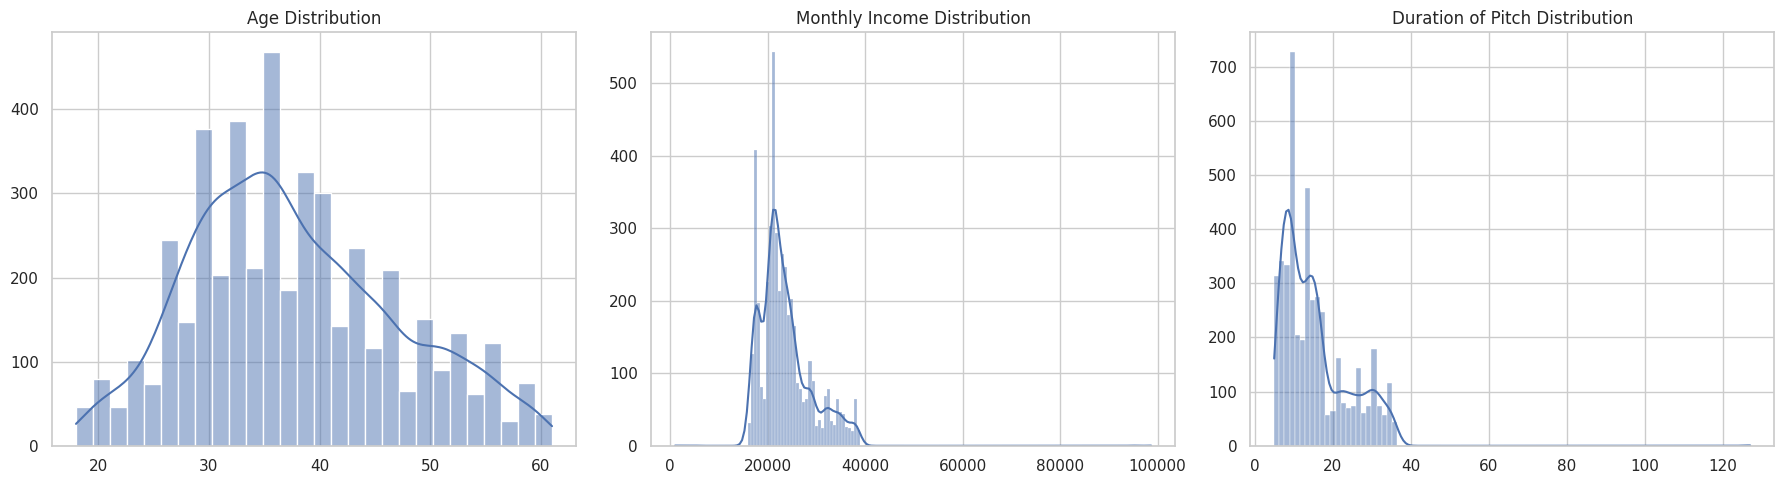

In [ ]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram and density plot for Age
sns.histplot(df1['Age'], kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

# Histogram and density plot for MonthlyIncome
sns.histplot(df1['MonthlyIncome'], kde=True, ax=axes[1])
axes[1].set_title('Monthly Income Distribution')

# Histogram and density plot for DurationOfPitch
sns.histplot(df1['DurationOfPitch'], kde=True, ax=axes[2])
axes[2].set_title('Duration of Pitch Distribution')

# Add titles and labels
for ax in axes.flat:
    ax.set_xlabel('')
    ax.set_ylabel('')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


From the visualisation, we can see that age is normally distributed, with a peak at 37 which is the median. We can see the range for monthly income distribution and duration of pitch. This diagrams correspond to the descriptive statistics. The peaks show the mean.

OUTLIERS

We use boxplots to detect outliers.

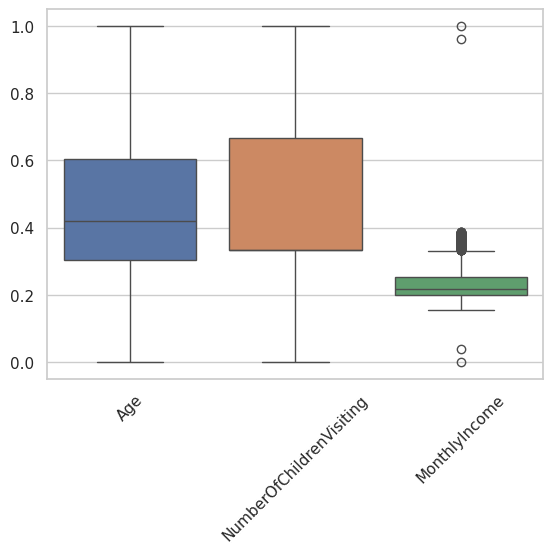

In [ ]:
# Create a boxplot to visualize distribution of all numeric variables and detect any outliers

# plot 1 boxplot for all variables so must first normalize the scale
from sklearn.preprocessing import MinMaxScaler

# select numeric columns
num_columns = df1[['Age','NumberOfChildrenVisiting', 'MonthlyIncome']]

#normalize values using min-max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(num_columns)

# Create df with normalized data
df_normalized = pd.DataFrame(normalized_data, columns=num_columns.columns)

sns.boxplot(data= df_normalized)
plt.xticks(rotation=45)

plt.show()

Monthly income shows outliers. Some people are extremely rich and some extremely poor. We further investigate the monthly income.

In [ ]:
# Determine the number of rows containing outliers for each variable that needs to be addressed

# Compute the 25th percentile value in `X_n == MonthlyIncome`
percentile25 = df1['MonthlyIncome'].quantile(0.25)

# Compute the 75th percentile value in `X_n`
percentile75 = df1['MonthlyIncome'].quantile(0.75)

# Compute the interquartile range in `X_n`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `X_n`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `X_n`
outliers = df1[(df1['MonthlyIncome'] > upper_limit) | (df1['MonthlyIncome'] < lower_limit)]

# Count how many rows in the data contain outliers in `X_n`
print("Number of rows in the data containing outliers in `MonthlyIncome`:", len(outliers))

Lower limit: 12508.5
Upper limit: 33408.5
Number of rows in the data containing outliers in `MonthlyIncome`: 345


We decide to delete the outliers.


In [ ]:
# use a boolean mask to delete outliers
mask = (df1['MonthlyIncome'] >= lower_limit) & (df1['MonthlyIncome'] <= upper_limit)

df = df1[mask].copy()
df.shape

(4310, 20)

The new dataset without the outliers in monthly income has 4310 observations and 20 attributes.

 We identify outliers in the MonthlyIncome column by calculating the 10th and 90th percentiles. We then replace values below the 10th percentile with the 10th percentile value and values above the 90th percentile with the 90th percentile value, effectively capping extreme outliers.

In [ ]:
# Calculate 10th percentile
tenth_percentile = np.percentile(df['MonthlyIncome'], 10)

# Calculate 90th percentile
ninetieth_percentile = np.percentile(df['MonthlyIncome'], 90)

# Apply lambda function to replace outliers with thresholds defined above
df['MonthlyIncome'] = (df['MonthlyIncome']
                       .apply(lambda x: (tenth_percentile
                                         if x < tenth_percentile
                                         else ninetieth_percentile
                                         if x > ninetieth_percentile
                                         else x))
                       )

CATEGORICAL DATA

We apply one-hot encoding to the Gender, MaritalStatus, and Passport columns in the dataset, creating a new DataFrame where these categorical variables are converted into binary columns for each category.

In [ ]:
# create list of columns that need to be encoded
columns_to_encode = ['Gender', 'MaritalStatus', 'Passport']

# instantiate new df from the encoded df
df2 = pd.get_dummies(df, columns=columns_to_encode)

df2.head()

,CustomerID,ProdTaken,Age,TypeOfContact,CityTier,DurationOfPitch,Occupation,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Passport_0,Passport_1
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,3,3.0,Deluxe,3.0,1.0,2,1,0.0,Manager,20993.0,True,False,False,False,True,False,False,True
1,200001,0,49.0,Company Invited,1,14.0,Salaried,3,4.0,Deluxe,4.0,2.0,3,1,2.0,Manager,20130.0,False,True,True,False,False,False,True,False
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,3,4.0,Basic,3.0,7.0,3,0,0.0,Executive,17579.9,False,True,False,False,True,False,False,True
3,200003,0,33.0,Company Invited,1,9.0,Salaried,2,3.0,Basic,3.0,2.0,5,1,1.0,Executive,17909.0,True,False,True,False,False,False,False,True
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,2,3.0,Basic,4.0,1.0,5,1,0.0,Executive,18468.0,False,True,True,False,False,False,True,False


After encoding categorical data, we can exlore these attributes.

<ipython-input-37-9eeefa03ae29>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x=col, palette='viridis', ax=axes[i])
<ipython-input-37-9eeefa03ae29>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x=col, palette='viridis', ax=axes[i])
<ipython-input-37-9eeefa03ae29>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x=col, palette='viridis', ax=axes[i])


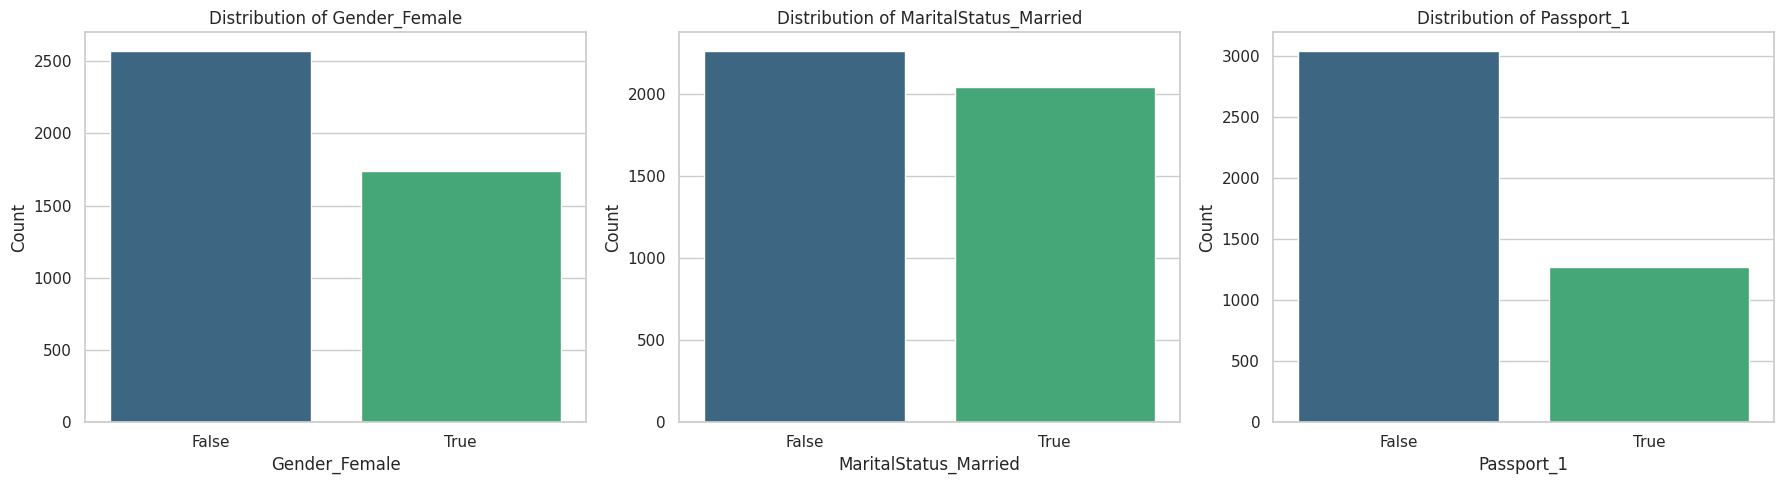

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of encoded columns
encoded_columns = ['Gender_Female', 'MaritalStatus_Married', 'Passport_1']

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot frequency of each encoded column
for i, col in enumerate(encoded_columns):
    sns.countplot(data=df2, x=col, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


The 3 graphs show the distribution of the female vs male, married vs single, passport holders and those who do not. The graph True shows females, married individual and passport holders respectively.

MaritalStatus_Married  False  True 
Gender_Female                      
False                   1311   1261
True                     954    784


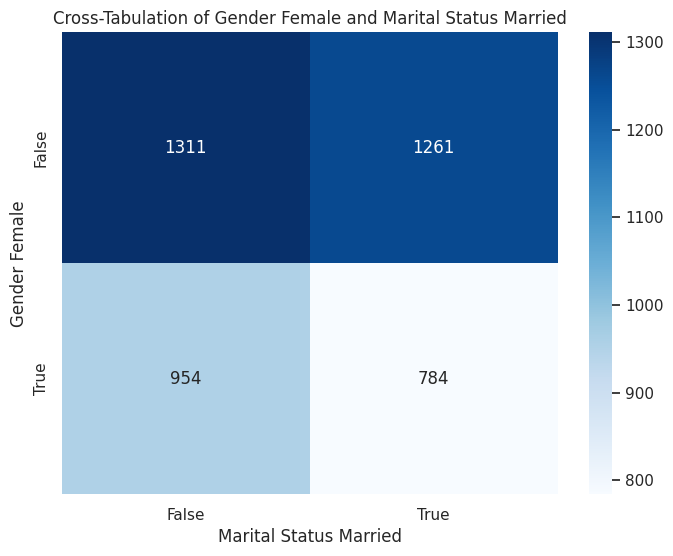

In [ ]:
# Cross-tabulation between two encoded variables
cross_tab = pd.crosstab(df2['Gender_Female'], df2['MaritalStatus_Married'])
print(cross_tab)

# Visualize cross-tabulation
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Cross-Tabulation of Gender Female and Marital Status Married')
plt.xlabel('Marital Status Married')
plt.ylabel('Gender Female')
plt.show()


This gives a summary of female married and single women. Also, male and married and single. 784 women are married and 954 are single. 1311 are unmarried men, and 1261 are married men.

Gender_Female
False    22303.093118
True     22659.795397
Name: MonthlyIncome, dtype: float64


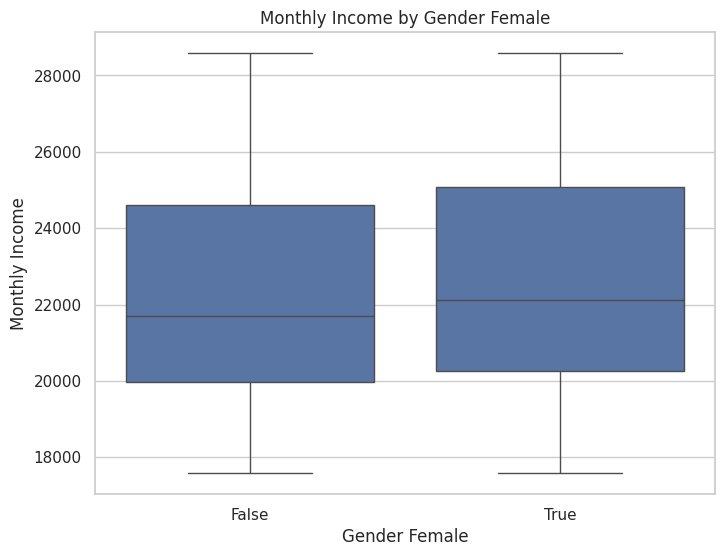

In [ ]:
# Group by 'Gender_Female' and aggregate 'MonthlyIncome'
grouped_data = df2.groupby('Gender_Female')['MonthlyIncome'].mean()
print(grouped_data)

# Plot box plot for 'MonthlyIncome' by 'Gender_Female'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender_Female', y='MonthlyIncome', data=df2)
plt.title('Monthly Income by Gender Female')
plt.xlabel('Gender Female')
plt.ylabel('Monthly Income')
plt.show()


This shows that females have a higher mean of monthly income.

CLASS IMBALANCE

From our descriptive statistics we know that 29.1% of people have passports. This means the class is imbalanced with the majority not holding passports.

We can downsample, where we decrease the majority class or upsample where we increase the minority class.

In [ ]:
# to downsample data use the resample() function from the sklearn.utils module.

from sklearn.utils import resample

# Separate your data into majority and minority classes
majority_data = df[df['Passport'] == 0]  # majority class
minority_data = df[df['Passport'] == 1]  # minority class

# Downsample the majority class
downsampled_majority = resample(majority_data, replace=False, n_samples=len(minority_data), random_state=42)

# Combine the downsampled majority class with the minority class
downsampled_data = pd.concat([downsampled_majority, minority_data])

# Check the class distribution of the downsampled data
downsampled_data['Passport'].value_counts()

,count
Passport,
0,1267
1,1267


This is after downsampling.

In [ ]:
# To upsample data use the resample() function from the sklearn.utils module.

from sklearn.utils import resample

# Separate your data into majority and minority classes
majority_data = df[df['Passport'] == 0]  # majority class
minority_data = df[df['Passport'] == 1]  # minority class

# Upsample the minority class
upsampled_minority = resample(minority_data, replace=True, n_samples=len(majority_data), random_state=42)

# Combine the upsampled minority class with the majority class
upsampled_data = pd.concat([majority_data, upsampled_minority])

# Check the class distribution of the upsampled data
upsampled_data['Passport'].value_counts()

,count
Passport,
0,3043
1,3043


After upsampling.

HYPOTHESIS TESTING

We use the same dataset to do a hypothesis test.


In [ ]:
# Load the dataset into a DataFrame and save in a variable
data = pd.read_excel("/content/drive/MyDrive/IIP/Travel_ML.xlsx")
data.head()

,CustomerID,ProdTaken,Age,Type_Of_Contact,CityTier,DurationOfPitch,Occupat,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passpo,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
 x1 = data.sample(n=500 , replace= True, random_state= 42)

In [ ]:
 x2 = data.sample(n=500 , replace= True, random_state= 36)

In [ ]:
x1['MonthlyIncome'].mean()

23934.094537815126

In [ ]:
x2['Age'].mean()

36.86257928118393

ONE SAMPLE T-TEST

We assesses whether the average of the sample significantly differs from a hypothesized population mean of 1.5 at a 5% significance level.

In [ ]:
from scipy.stats import ttest_1samp

sample = np.array([1.2, 1.8, 0.9, 1.3, 1.5, 1.4, 1.6, 1.1, 1.7, 1.2])

null_hypothesis = 1.5   # The null hypothesis is that the population mean is 1.5 for this example
alpha =  0.05           # The significance level is 5%

t_statistic, p_value = ttest_1samp(sample, null_hypothesis) # becareful of the data here

# Check the p-value against the significance level to determine whether to reject or fail to reject the null hypothesis:
if p_value < alpha:
    print("The p-value is", p_value, "which is less than the significance level of", alpha)
    print("We reject the null hypothesis that the population mean is", null_hypothesis)
else:
    print("The p-value is", p_value, "which is greater than or equal to the significance level of", alpha)
    print("We fail to reject the null hypothesis that the population mean is", null_hypothesis)

The p-value is 0.1803355328284763 which is greater than or equal to the significance level of 0.05
We fail to reject the null hypothesis that the population mean is 1.5


We  checks if the average age in the sample differs significantly from 23,281.776 using a significance level of 5%.

In [ ]:
from scipy.stats import ttest_1samp

sample = x1['Age']

null_hypothesis = 23281.776   # The null hypothesis is that the population mean for this example
alpha =  0.05           # The significance level is 5%

t_statistic, p_value = ttest_1samp(sample, null_hypothesis) # becareful of the data here

# Check the p-value against the significance level to determine whether to reject or fail to reject the null hypothesis:
if p_value < alpha:
    print("The p-value is", p_value, "which is less than the significance level of", alpha)
    print("We reject the null hypothesis that the population mean is", null_hypothesis)
else:
    print("The p-value is", p_value, "which is greater than or equal to the significance level of", alpha)
    print("We fail to reject the null hypothesis that the population mean is", null_hypothesis)

The p-value is nan which is greater than or equal to the significance level of 0.05
We fail to reject the null hypothesis that the population mean is 23281.776


ONE SAMPLE Z-TEST

We check if the sample mean significantly differs from a hypothesized mean of 1.5, using a z-test with a known population standard deviation and a significance level of 5%.

In [ ]:
from scipy.stats import norm

data = sample = np.array([1.2, 1.8, 0.9, 1.3, 1.5, 1.4, 1.6, 1.1, 1.7, 1.2])

null_hypothesis = 1.5     # The null hypothesis is that the population mean is 1.5 for this example
sigma = 0.3               # The population standard deviation has to be known for z-tests
alpha = 0.05            # The significance level is 5%

# Calculate the z-score
z_score = (np.mean(data) - null_hypothesis) / (sigma / np.sqrt(len(data)))

# Calculate the p-value
p_value = 2 * norm.sf(np.abs(z_score))  # two-sided test

# Check the p-value against the significance level to determine whether to reject or fail to reject the null hypothesis:
if p_value < alpha:
    print("The p-value is", p_value, "which is less than the significance level of", alpha)
    print("We reject the null hypothesis that the population mean is", null_hypothesis)
else:
    print("The p-value is", p_value, "which is greater than or equal to the significance level of", alpha)
    print("We fail to reject the null hypothesis that the population mean is", null_hypothesis)

The p-value is 0.170586932871441 which is greater than or equal to the significance level of 0.05
We fail to reject the null hypothesis that the population mean is 1.5


We  test whether the average MonthlyIncome differs significantly from a hypothesized mean of 23,281.776, using a z-test with a known population standard deviation and a 5% significance level.

In [ ]:
from scipy.stats import norm

sample = df['MonthlyIncome']

null_hypothesis = 23281.776      # The null hypothesis is that the population mean for this example
sigma = 0.4               # The population standard deviation has to be known for z-tests
alpha = 0.05            # The significance level is 5%

# Calculate the z-score
z_score = (np.mean(data) - null_hypothesis) / (sigma / np.sqrt(len(data)))

# Calculate the p-value
p_value = 2 * norm.sf(np.abs(z_score))  # two-sided test

# Check the p-value against the significance level to determine whether to reject or fail to reject the null hypothesis:
if p_value < alpha:
    print("The p-value is", p_value, "which is less than the significance level of", alpha)
    print("We reject the null hypothesis that the population mean is", null_hypothesis)
else:
    print("The p-value is", p_value, "which is greater than or equal to the significance level of", alpha)
    print("We fail to reject the null hypothesis that the population mean is", null_hypothesis)

The p-value is 0.0 which is less than the significance level of 0.05
We reject the null hypothesis that the population mean is 23281.776


TWO SAMPLE T-TEST

We check if there is a significant difference between the means of two independent samples using a t-test with the assumption of unequal variances.

In [ ]:
from scipy.stats import ttest_ind

sample1 = np.array([1.2, 1.8, 0.9, 1.3, 1.5])
sample2 = np.array([1.4, 1.6, 1.1, 1.7, 1.2])

# Specify the null hypothesis and the significance level (alpha)
null_hypothesis = 0  # The null hypothesis is that the population means are equal
alpha = 0.05  # The significance level is 5%

# Use the ttest_ind() function to perform the two-sample t-test
t_statistic, p_value = ttest_ind(sample1, sample2, equal_var= False)

# Check the p-value against the significance level to determine whether to reject or fail to reject the null hypothesis
if p_value < alpha:
    print("The p-value is", p_value, "which is less than the significance level of", alpha)
    print("We reject the null hypothesis that the population means are equal")
else:
    print("The p-value is", p_value, "which is greater than or equal to the significance level of", alpha)
    print("We fail to reject the null hypothesis that the population means are equal")

The p-value is 0.7592061189684592 which is greater than or equal to the significance level of 0.05
We fail to reject the null hypothesis that the population means are equal


TWO SAMPLE Z-TEST

In [ ]:
from scipy.stats import norm

sample1 = np.array([1.2, 1.8, 0.9, 1.3, 1.5])
sample2 = np.array([1.4, 1.6, 1.1, 1.7, 1.2])

# Specify the null hypothesis, the population standard deviation (sigma), and the significance level (alpha)
null_hypothesis = 0  # The null hypothesis is that the population means are equal
sigma1 = np.std(sample1, ddof=1)  # The sample standard deviations are used to estimate the population standard deviations
sigma2 = np.std(sample2, ddof=1)
n1 = len(sample1)  # The sample sizes
n2 = len(sample2)
alpha = 0.05  # The significance level is 5%

# Calculate the z-score
z_score = ((np.mean(sample1) - np.mean(sample2)) - null_hypothesis) / np.sqrt((sigma1**2/n1) + (sigma2**2/n2))

# Calculate the p-value using the standard normal distribution (since the null hypothesis is that the population means are equal, rather than a range of values)
p_value = 2 * norm.sf(np.abs(z_score))  # two-sided test

# Check the p-value against the significance level to determine whether to reject or fail to reject the null hypothesis
if p_value < alpha:
    print("The p-value is", p_value, "which is less than the significance level of", alpha)
    print("We reject the null hypothesis that the population means are equal")
else:
    print("The p-value is", p_value, "which is greater than or equal to the significance level of", alpha)
    print("We fail to reject the null hypothesis that the population means are equal")


The p-value is 0.7504854193424552 which is greater than or equal to the significance level of 0.05
We fail to reject the null hypothesis that the population means are equal
